In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [30]:
# Import the dataset
from keras.datasets import cifar10

# Import various componenets for model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop

# Import the backend
from keras import backend as K

In [31]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [32]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [35]:
# Change shape 
# Note that our images are 3*32*32 pixels, so in reshaping to arrays we want
# 50,000 arrays of length 3072, one for each image
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)

In [36]:
# Convert to float32 for type consistency
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize values to 1 from 0 to 255 (256 values of pixels)
x_train /= 255
x_test /= 255

# Print sample sizes
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
# So instead of one column with 10 values, create 10 binary columns
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

50000 train samples
10000 test samples


In [39]:
# Start with a simple sequential model
model = Sequential()

# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model.add(Dense(64, activation='relu', input_shape=(3072,)))
# Dropout layers remove features and fight overfitting
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
# End with a number of units equal to the number of classes we have for our outcome
model.add(Dense(10, activation='softmax'))

model.summary()

# Compile the model to put it all together.
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                196672    
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 201,482
Trainable params: 201,482
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/10





50000/50000 [==============================] - 7s 136us/step - loss: 2.0981 - acc: 0.2250 - val_loss: 1.8931 - val_acc: 0.3123
Epoch 2/10
50000/50000 [==============================] - 4s 84us/step - loss: 1.9106 - acc: 0.3002 - val_loss: 1.8251 - val_acc: 0.3333
Epoch 3/10
50000/50000 [==============================] - 4s 77us/step - loss: 1.8557 - acc: 0.3221 - val_loss: 1.7447 - val_acc: 0.3735
Epoch 4/10
50000/50000 [==============================] - 4s 81us/step - loss: 1.8245 - acc: 0.3359 - val_loss: 1.7650 - val_acc: 0.3615
Epoch 5/10
50000/50000 [==============================] - 5s 92us/step - loss: 1.8023 - acc: 0.3471 - val_loss: 1.7390 - val_acc: 0.3853
Epoch 6/10
50000/50000 [==============================] - 4s 86us/step - loss: 1.7784 - acc: 0.3566 - val_loss: 1.7074 - val_acc: 0.3863
Epoch 7/10
50000/50000 [=

In [42]:
# adding more layers with 128 perceptrons (still sequetial)
model = Sequential()

# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model.add(Dense(128, activation='relu', input_shape=(3072,)))
# Dropout layers remove features and fight overfitting
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
# End with a number of units equal to the number of classes we have for our outcome
model.add(Dense(10, activation='softmax'))

model.summary()

# Compile the model to put it all together.
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               393344    
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
__________

In [43]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 142us/step - loss: 2.0577 - acc: 0.2378 - val_loss: 1.8883 - val_acc: 0.3175
Epoch 2/10
50000/50000 [==============================] - 6s 121us/step - loss: 1.8778 - acc: 0.3191 - val_loss: 1.7694 - val_acc: 0.3654
Epoch 3/10
50000/50000 [==============================] - 9s 171us/step - loss: 1.8108 - acc: 0.3454 - val_loss: 1.7356 - val_acc: 0.3837
Epoch 4/10
50000/50000 [==============================] - 8s 165us/step - loss: 1.7663 - acc: 0.3609 - val_loss: 1.7731 - val_acc: 0.3595
Epoch 5/10
50000/50000 [==============================] - 10s 193us/step - loss: 1.7326 - acc: 0.3797 - val_loss: 1.7379 - val_acc: 0.3782
Epoch 6/10
50000/50000 [==============================] - 7s 140us/step - loss: 1.7058 - acc: 0.3876 - val_loss: 1.6625 - val_acc: 0.4042
Epoch 7/10
50000/50000 [==============================] - 6s 122us/step - loss: 1.6827 - acc: 0.3952 - val_loss: 1.6154 -

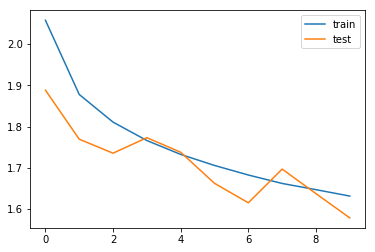

In [45]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

The simple sequetial models appear to be performing quite poorly Let's try a convoluted model.

In [46]:
# input image dimensions, from our data
img_rows, img_cols = 32, 32
num_classes = 10

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Building the Model
model = Sequential()
# First convolutional layer, note the specification of shape
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 270s 5ms/step - loss: 1.8500 - acc: 0.3354 - val_loss: 1.4102 - val_acc: 0.5041
Epoch 2/10
50000/50000 [==============================] - 268s 5ms/step - loss: 1.4304 - acc: 0.4911 - val_loss: 1.1908 - val_acc: 0.5788
Epoch 3/10
50000/50000 [==============================] - 271s 5ms/step - loss: 1.2436 - acc: 0.5625 - val_loss: 1.1541 - val_acc: 0.5807
Epoch 4/10
50000/50000 [==============================] - 282s 6ms/step - loss: 1.1206 - acc: 0.6059 - val_loss: 1.0026 - val_acc: 0.6506
Epoch 5/10
50000/50000 [==============================] - 268s 5ms/step - loss: 1.0314 - acc: 0.6388 - val_loss: 0.9710 - val_acc: 0.6536
Epoch 6/10
50000/50000 [==============================] - 273s 5ms/step - loss: 0.9638 - acc: 0.6641 - val_loss: 0.9273 - val_acc: 0.6773
Epoch 7/10
50000/50000 [========================

70.35% accuracy. Much better! However, this was (unsurprisingly) slow. Let's try a recurrent network.

In [48]:
# Training parameters.
batch_size = 64
num_classes = 10
epochs = 3

# Embedding dimensions.
row_hidden = 32
col_hidden = 32

# The data, shuffled and split between train and test sets.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Converts class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

row, col, pixel = x_train.shape[1:]

# 4D input.
x = Input(shape=(row, col, pixel))

# Encodes a row of pixels using TimeDistributed Wrapper.
encoded_rows = TimeDistributed(LSTM(row_hidden))(x)

# Encodes columns of encoded rows.
encoded_columns = LSTM(col_hidden)(encoded_rows)

# Final predictions and model.
prediction = Dense(num_classes, activation='softmax')(encoded_columns)
model = Model(x, prediction)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training.
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluation.
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 256s 5ms/step - loss: 2.0217 - acc: 0.2574 - val_loss: 2.0407 - val_acc: 0.2859
Epoch 2/3
50000/50000 [==============================] - 372s 7ms/step - loss: 1.8362 - acc: 0.3343 - val_loss: 1.8030 - val_acc: 0.3543
Epoch 3/3
50000/50000 [==============================] - 359s 7ms/step - loss: 1.7455 - acc: 0.3662 - val_loss: 1.8956 - val_acc: 0.3382
Test loss: 1.8956369766235353
Test accuracy: 0.3382


This accuracy is worse than the sequential model, but it took much longer to run. Overall the convoluted network model is probably the best, even though the run time was not the shortest.